# LIONEL_AI_2024_MINOR_PROJECT

## 1. Data Pre-Processing

In [3]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\lione\Documents\AI_2024\AI_CORIZO_MINORPROJ\spotify dataset.csv'
spotify_data = pd.read_csv(file_path)

# Display the first few rows and summary information of the dataset
spotify_data_info = spotify_data.info()
spotify_data_head = spotify_data.head()

spotify_data_info, spotify_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

(None,
                  track_id                                         track_name  \
 0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
 1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
 2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
 3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
 4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   
 
        track_artist  track_popularity          track_album_id  \
 0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
 1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
 2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
 3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
 4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   
 
                                     track_album_name track_album_release_date  \
 0  I Don't Care (with Ju

In [4]:
# Step 1: Handling missing values
# Check for missing values in the dataset
missing_values = spotify_data.isnull().sum()
missing_values

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
# For simplicity, let's drop rows with missing values
spotify_data_cleaned = spotify_data.dropna()

In [6]:
# Step 2: Data type conversion
# Explicitly create a copy of the dataframe before modifying it
spotify_data_cleaned = spotify_data.dropna().copy()

# Now we can safely modify the 'track_album_release_date' column
spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'], errors='coerce')

In [7]:
# Step 3: Feature scaling
from sklearn.preprocessing import StandardScaler

In [8]:
# Select only numerical columns that we want to scale (auditory features)
auditory_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                     'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

In [9]:
# Scaling the numeric columns
scaler = StandardScaler()
spotify_data_cleaned[auditory_features] = scaler.fit_transform(spotify_data_cleaned[auditory_features])

In [10]:
# Step 4: Encoding categorical variables
# Use one-hot encoding for 'playlist_genre' and 'playlist_subgenre'
spotify_data_encoded = pd.get_dummies(spotify_data_cleaned, columns=['playlist_genre', 'playlist_subgenre'], drop_first=True)

In [11]:
# To display the first few rows of the cleaned dataset
spotify_data_encoded.head()

# Or use this to display the entire DataFrame in a Jupyter Notebook:
from IPython.display import display
display(spotify_data_encoded)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,danceability,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.642015,...,False,False,False,False,False,False,False,False,False,False
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.490384,...,False,False,False,False,False,False,False,False,False,False
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.138877,...,False,False,False,False,False,False,False,False,False,False
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.435246,...,False,False,False,False,False,False,False,False,False,False
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,-0.033430,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,-1.563520,...,False,False,False,False,True,False,False,False,False,False
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,-0.915644,...,False,False,False,False,True,False,False,False,False,False
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,-0.867398,...,False,False,False,False,True,False,False,False,False,False
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,-0.198845,...,False,False,False,False,True,False,False,False,False,False


In [12]:
# Display processed data summary
spotify_data_encoded.info(), spotify_data_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 49 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   track_id                                     32828 non-null  object        
 1   track_name                                   32828 non-null  object        
 2   track_artist                                 32828 non-null  object        
 3   track_popularity                             32828 non-null  int64         
 4   track_album_id                               32828 non-null  object        
 5   track_album_name                             32828 non-null  object        
 6   track_album_release_date                     30942 non-null  datetime64[ns]
 7   playlist_name                                32828 non-null  object        
 8   playlist_id                                  32828 non-null  object        
 9   

(None,
                  track_id                                         track_name  \
 0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
 1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
 2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
 3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
 4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   
 
        track_artist  track_popularity          track_album_id  \
 0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
 1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
 2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
 3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
 4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   
 
                                     track_album_name track_album_release_date  \
 0  I Don't Care (with Ju

##  2. Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style for the plots
plt.style.use('ggplot')

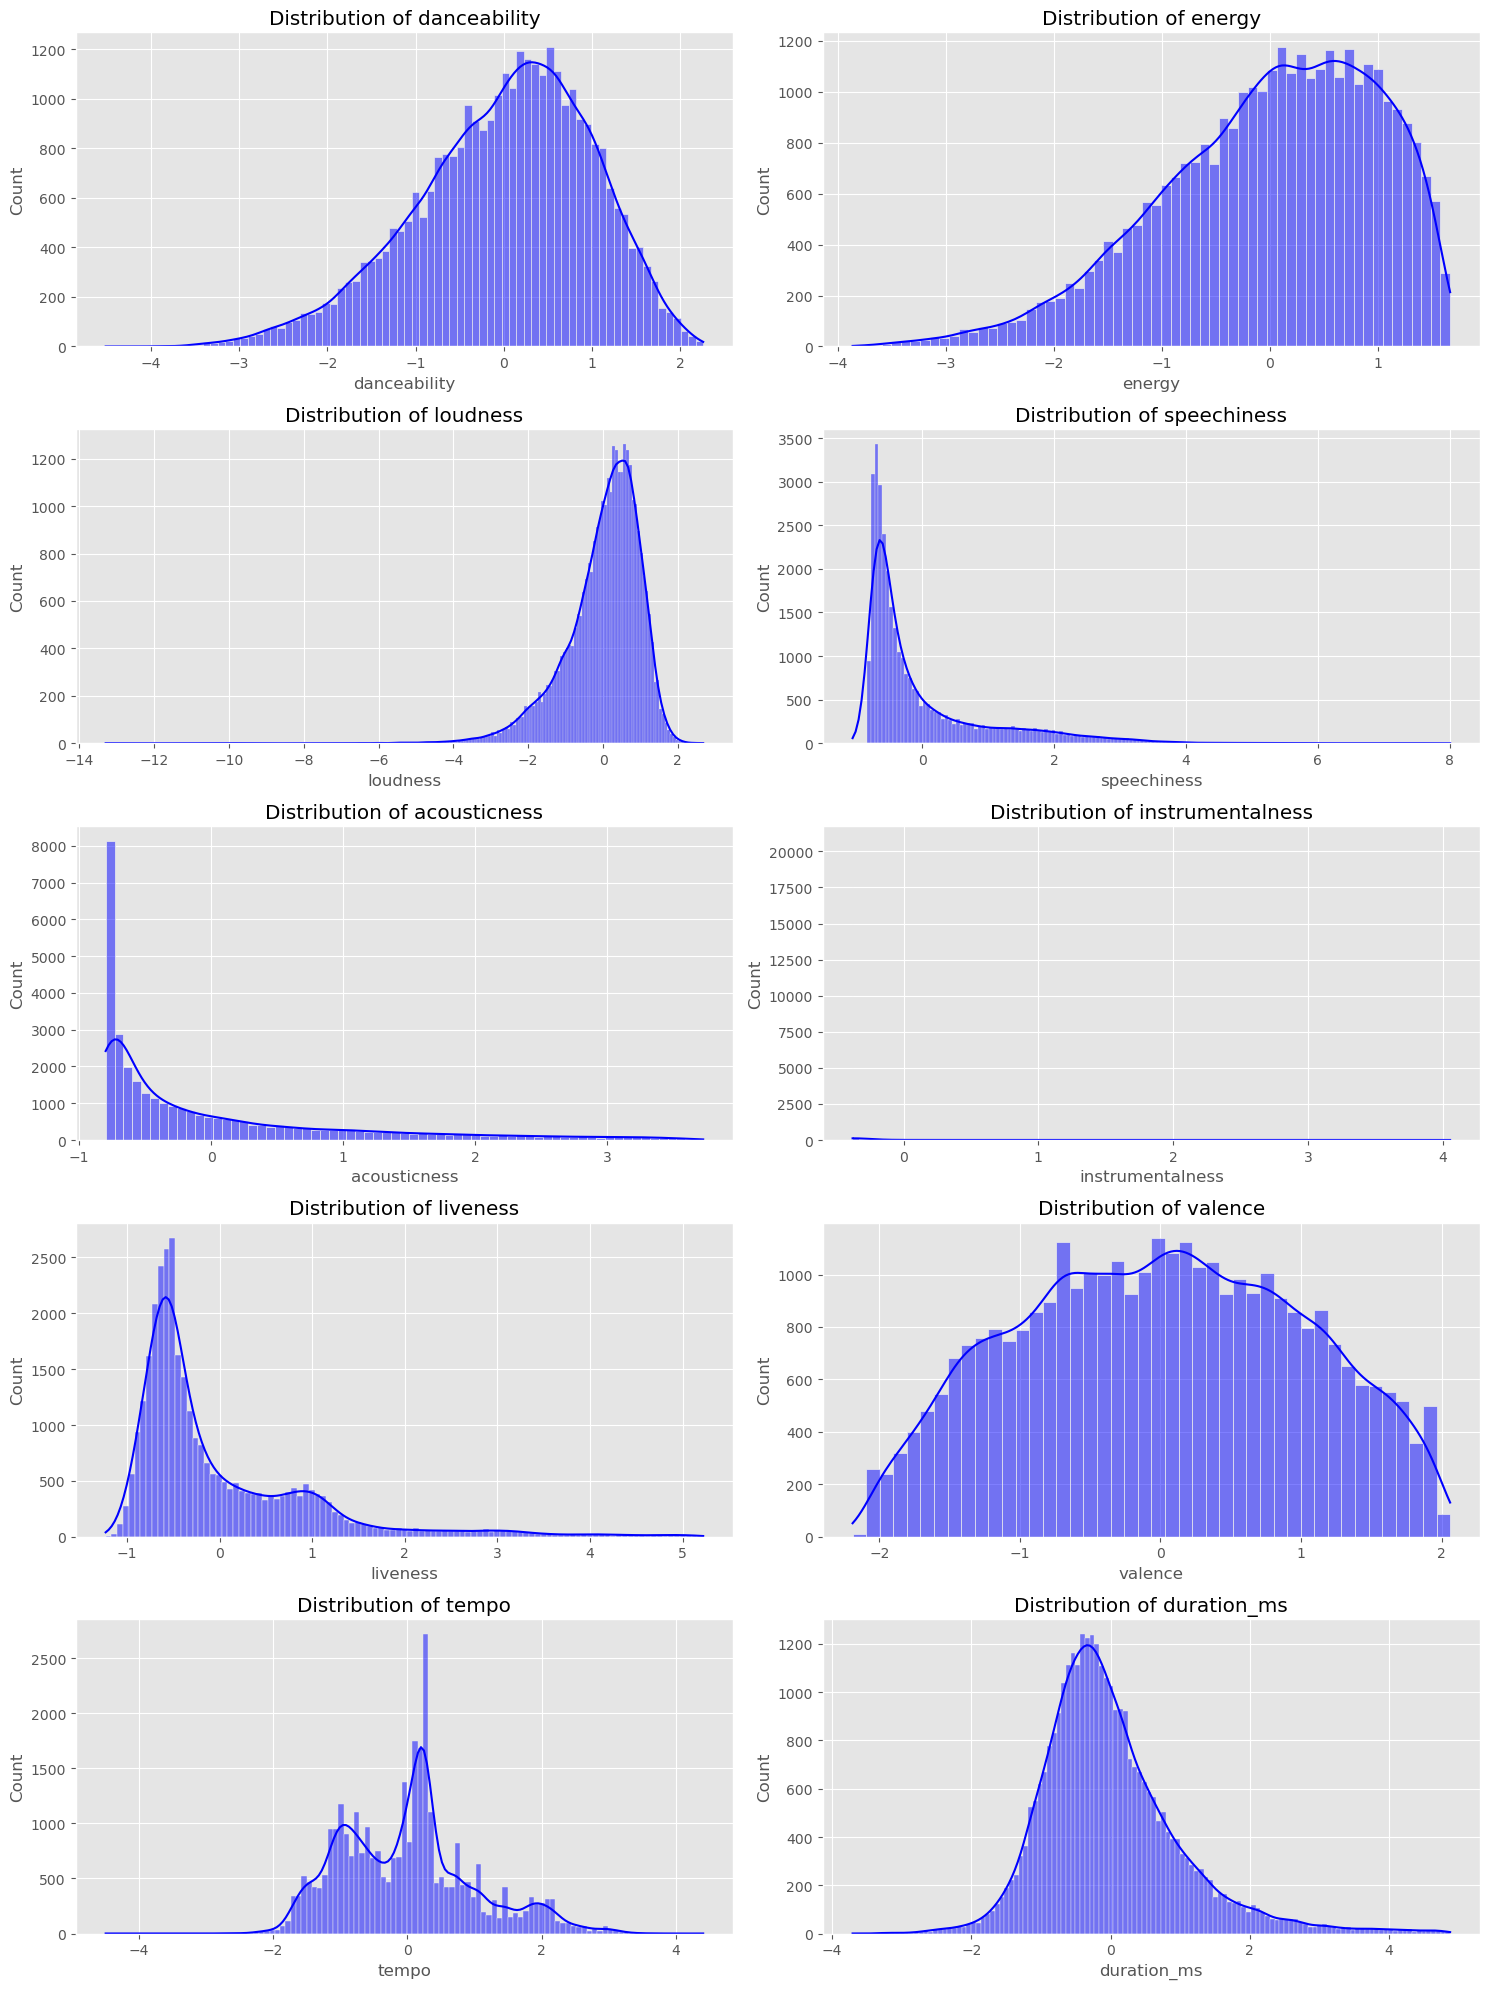

In [15]:
# Step 1: Histograms for auditory features
auditory_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                     'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(auditory_features):
    sns.histplot(spotify_data_encoded[feature], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

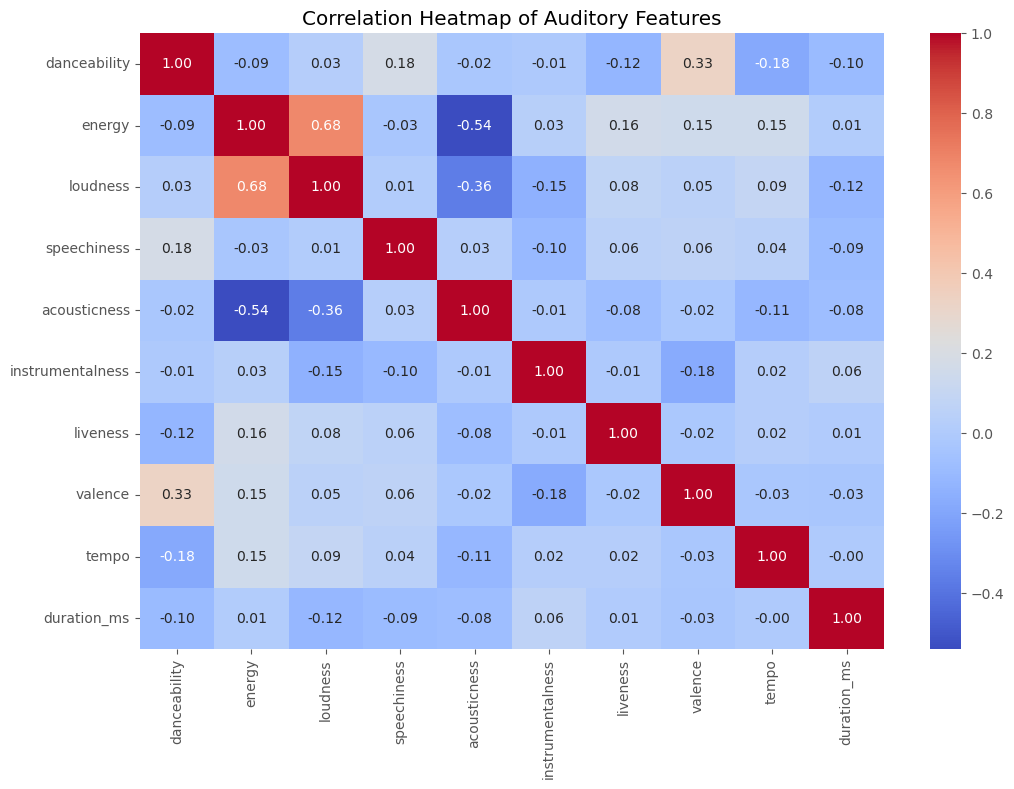

In [16]:
# Step 2: Correlation heatmap of auditory features
plt.figure(figsize=(12, 8))
corr_matrix = spotify_data_encoded[auditory_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Auditory Features")
plt.show()

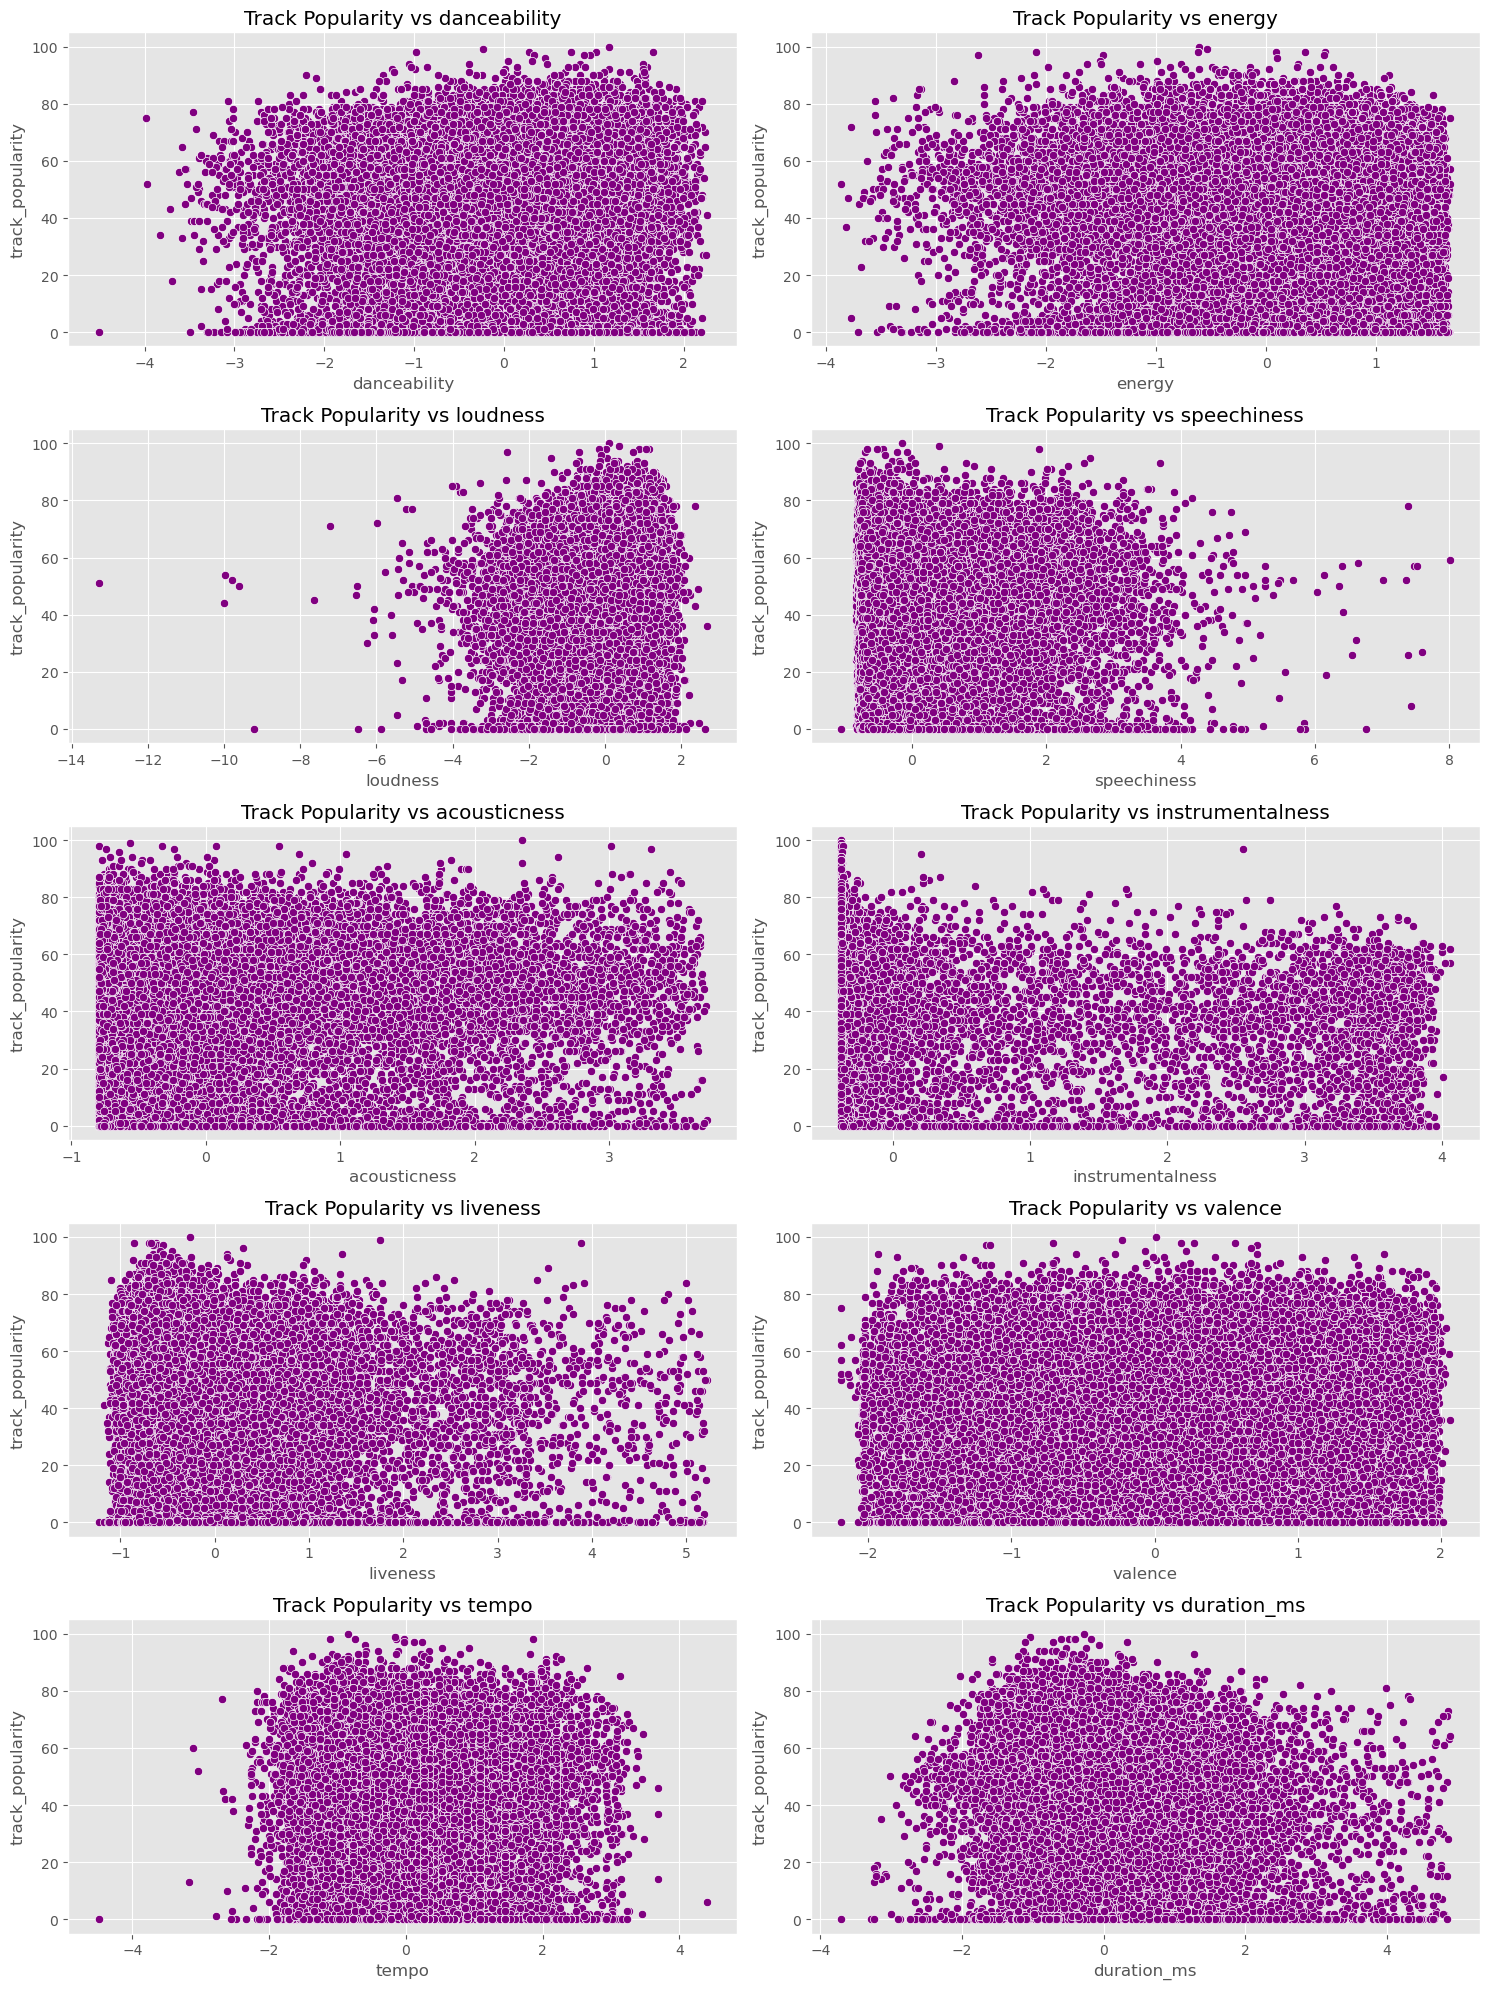

In [17]:
# Step 3: Scatter plot of track popularity vs auditory features
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(auditory_features):
    sns.scatterplot(x=spotify_data_encoded[feature], y=spotify_data_encoded['track_popularity'], ax=axes[i], color='purple')
    axes[i].set_title(f"Track Popularity vs {feature}")

plt.tight_layout()
plt.show()

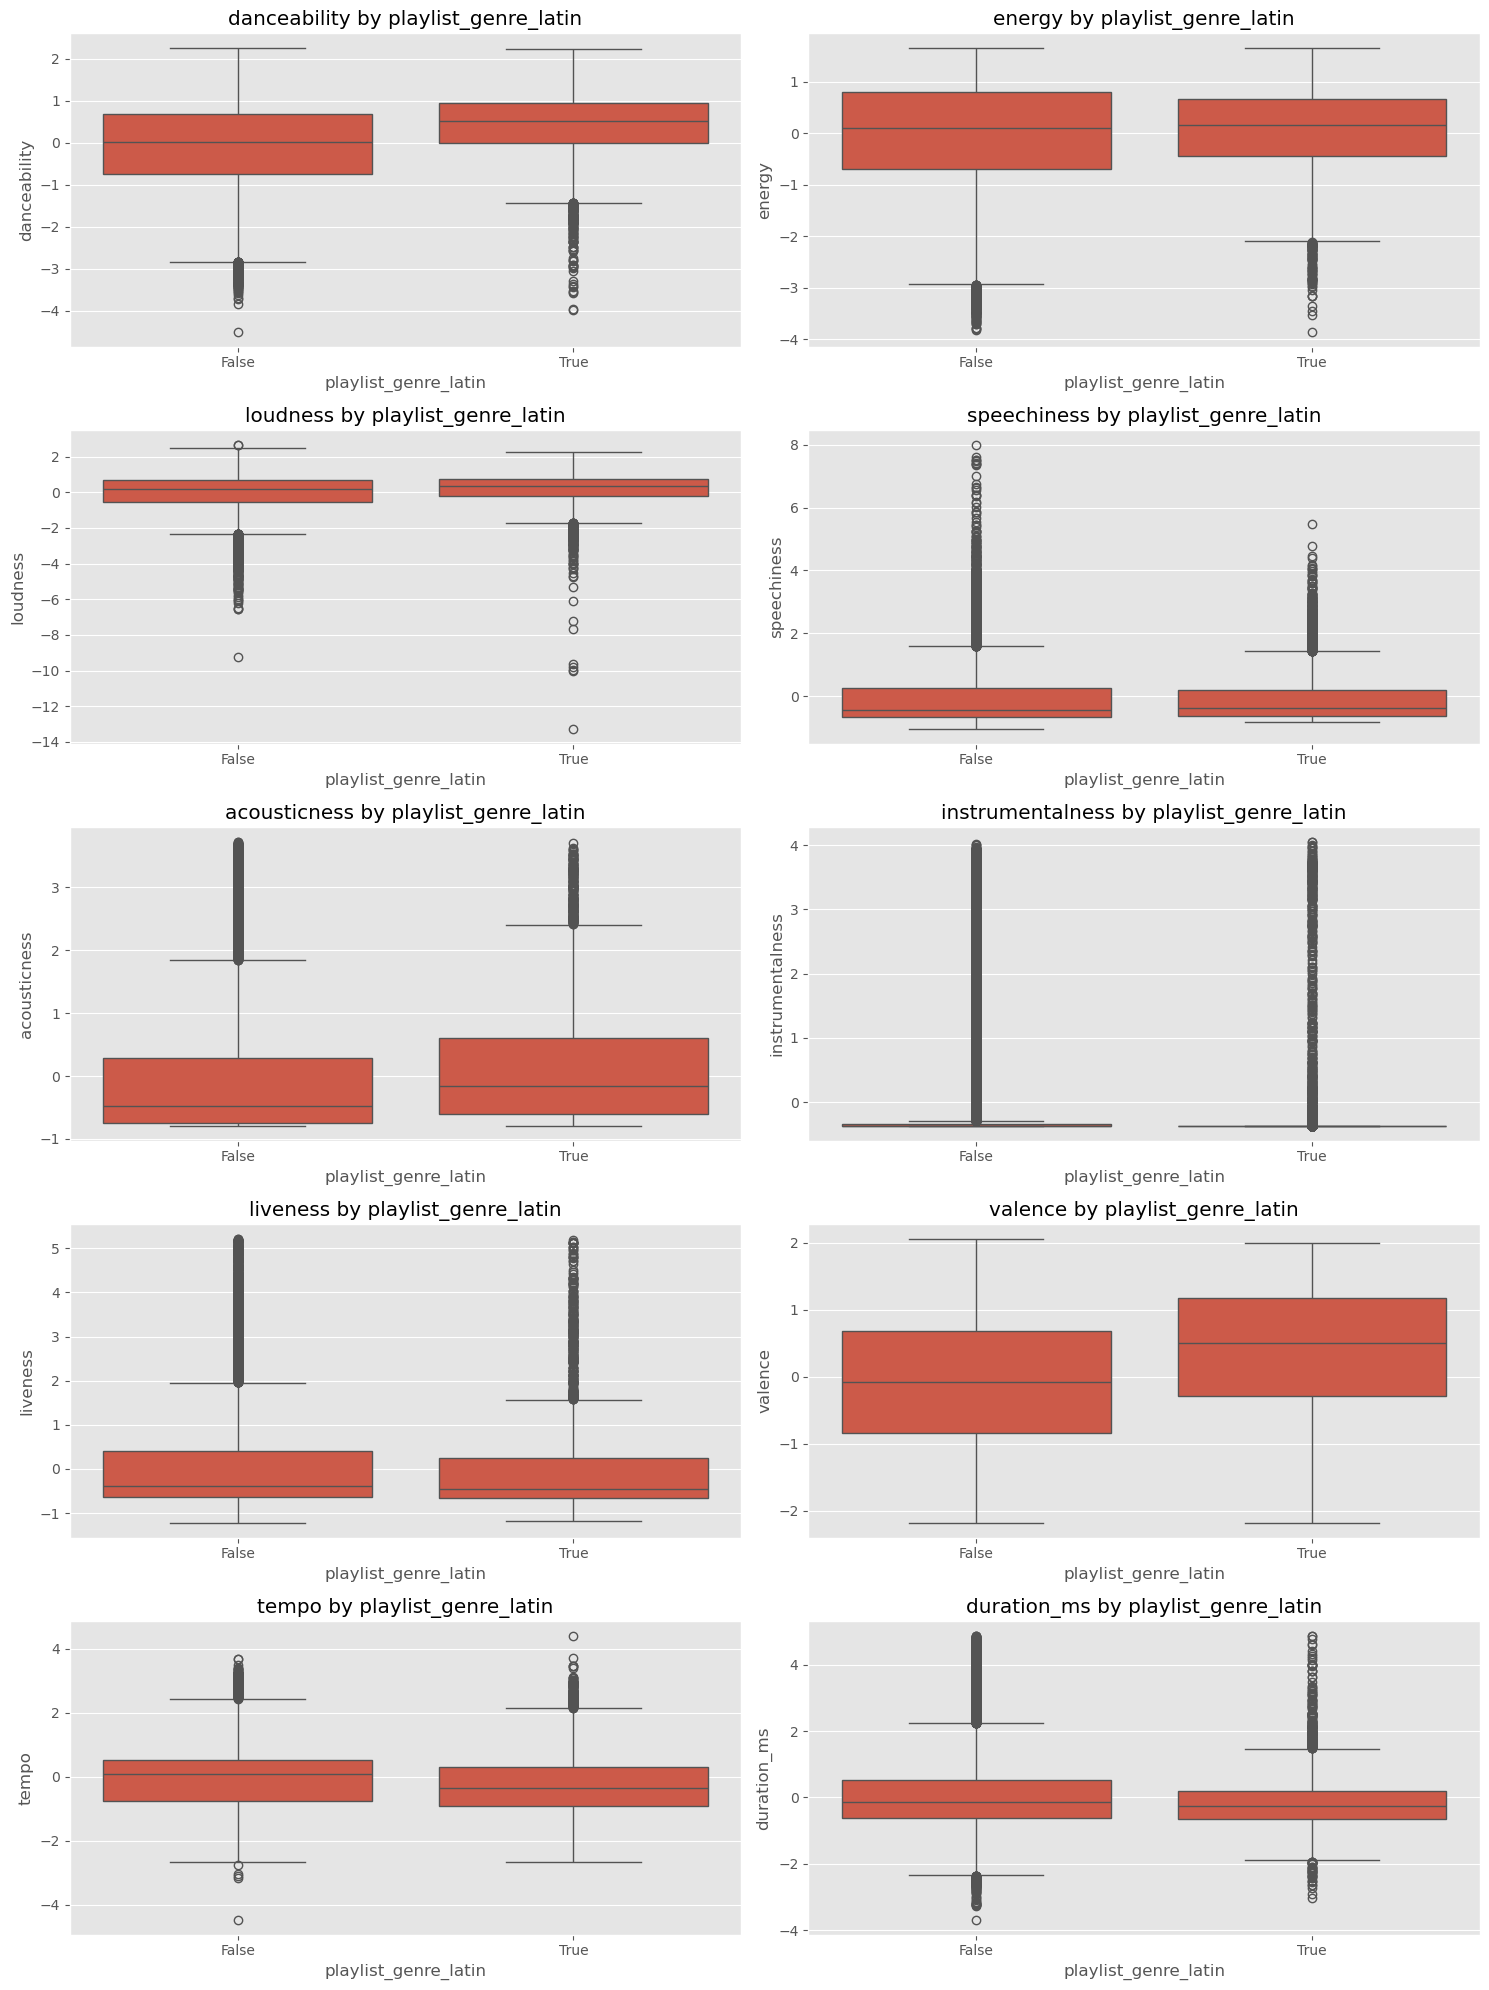

In [18]:
# Step 4: Box plots of auditory features by playlist_genre
genres = [col for col in spotify_data_encoded.columns if 'playlist_genre_' in col]

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(auditory_features):
    sns.boxplot(data=spotify_data_encoded, x=genres[0], y=feature, ax=axes[i])
    axes[i].set_title(f"{feature} by {genres[0]}")

plt.tight_layout()
plt.show()

## Correlation Matrix

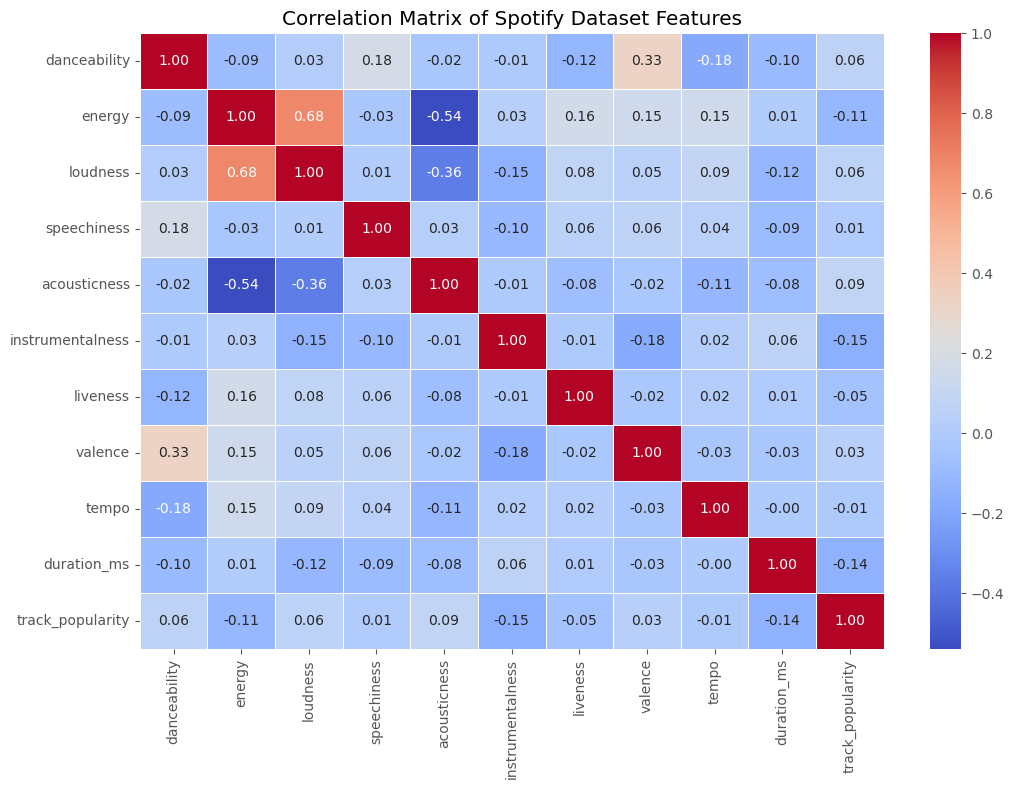

In [20]:
# Generate the correlation matrix
correlation_matrix = spotify_data_encoded[auditory_features + ['track_popularity']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Spotify Dataset Features")
plt.show()

## 4. Clusters

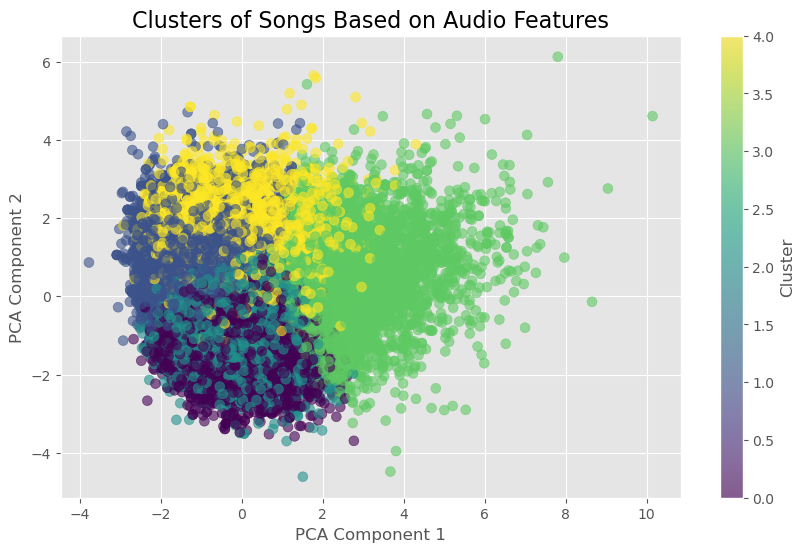

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant numerical features for clustering
audio_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spotify_data_cleaned[audio_features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
spotify_data_cleaned['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters by playlist genres using a scatter plot (PCA to reduce to 2 dimensions)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=spotify_data_cleaned['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Clusters of Songs Based on Audio Features', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

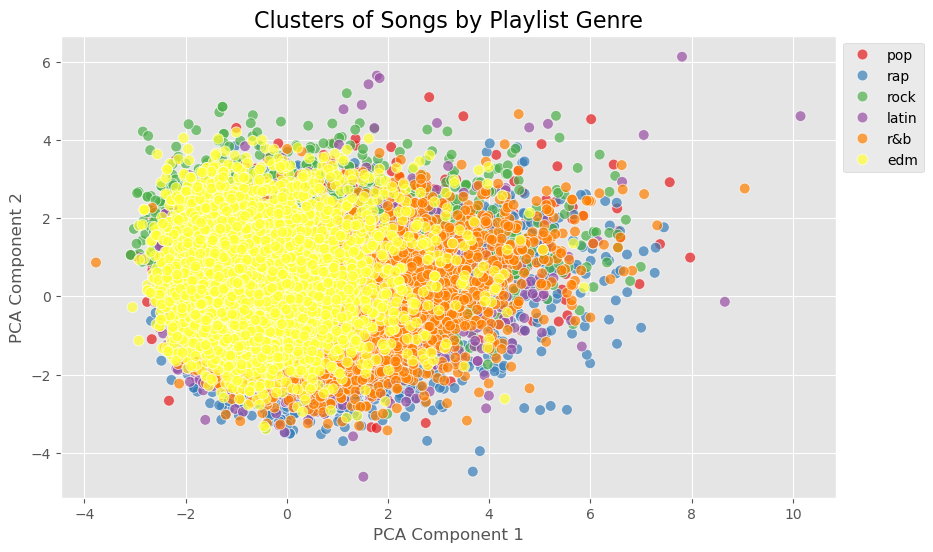

In [23]:
# Plot different clusters based on playlist genre and other audio features

# Use the PCA-reduced data for better visualization and color by playlist genre
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=spotify_data_cleaned['playlist_genre'], 
                palette='Set1', alpha=0.7, s=60)
plt.title('Clusters of Songs by Playlist Genre', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## 5. Recommender System Model

In [25]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(scaled_data[:, :11])  # Use only the relevant audio feature columns for clustering

def recommend_songs(song_name, num_recommendations=5):
    # Find the song in the dataset
    song_idx = spotify_data_cleaned[spotify_data_cleaned['track_name'] == song_name].index
    
    if len(song_idx) == 0:
        return "Song not found in the dataset"
    
    # Get the audio features of the selected song
    song_features = scaled_data[song_idx].reshape(1, -1)[:, :11]  # Only use the first 11 features
    
    # Find the nearest neighbors
    distances, indices = knn.kneighbors(song_features, n_neighbors=num_recommendations + 1)
    
    # Return recommended songs (excluding the input song itself)
    recommended_songs = spotify_data_cleaned.iloc[indices[0][1:]][['track_name', 'track_artist', 'playlist_genre']]
    return recommended_songs

# Example recommendation for a song
recommendation_result = recommend_songs("I Don't Care (with Justin Bieber) - Loud Luxury Remix")

In [26]:
# Removing the ace_tools import and directly displaying the result
recommendation_result

,track_name,track_artist,playlist_genre
29684,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,edm
19639,Todavia,La Factoria,latin
22155,TTM (feat. Wiz Khalifa & NGHTMRE),PnB Rock,r&b
976,On Replay,Costa Leon,pop
654,Fallin',Sick Individuals,pop
